In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
import os
import matplotlib
import matplotlib.patches as patches

matplotlib.rcParams.update({'errorbar.capsize': 4})


# Analysis widefield IPG-n free/BaCl2

Preparation of solutions for spectrometry.

In [3]:
filtAv = [438, 472, 500, 527, 549, 561, 568, 605, 631, 661, 692]
filtUn = np.array([28, 35, 29, 22, 21, 21, 26, 22, 28, 26, 47]) / 2
filtQE = np.array([0.52654585, 0.61510198, 0.67157561, 0.70026282, 0.71884383, 0.72505143, 0.7279477, 0.72530424, 0.71414267, 0.68976776, 0.6438945])

## Sample A: IPG-4 0.5 µM + BaCl2 7.5 mM (insoluble)


In [4]:
def prepare_spectrum(files, roi):
    nfilt = len(files)
    
    img = io.imread(files[0]).astype(np.int64)
    imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
    roiSize = imroi.shape[0] * imroi.shape[1]
    offset = 100 * roiSize

    avInt = []
    unInt = []
    for i in range(nfilt-1):
        img = io.imread(files[i]).astype(np.int64)
        imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
        intPx = (imroi.sum() - offset) / roiSize
        avInt.append(intPx)
        
        unPx = np.sqrt((imroi**2).sum()) / roiSize
        unInt.append(unPx)

    avInt = np.array(avInt)
    unInt = np.array(unInt)
    cntQe = avInt / filtQE
    # cntQe /= (filtUn*2)

    unInt /= filtQE
    # unInt /= (filtUn*2)


    return cntQe, unInt

['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM/3/Center-438nm_Width-28nm_16-02-22.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM/3/Center-472nm_Width-35nm_16-02-22.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM/3/Center-500nm_Width-29nm_16-02-22.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM/3/Center-527nm_Width-22nm_16-02-22.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM/3/Center-549nm_Width-21nm_16-02-22.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab

[Text(0.5, 0, '$\\lambda$ (nm)'), Text(0, 0.5, 'cnts/px/$\\lambda$')]

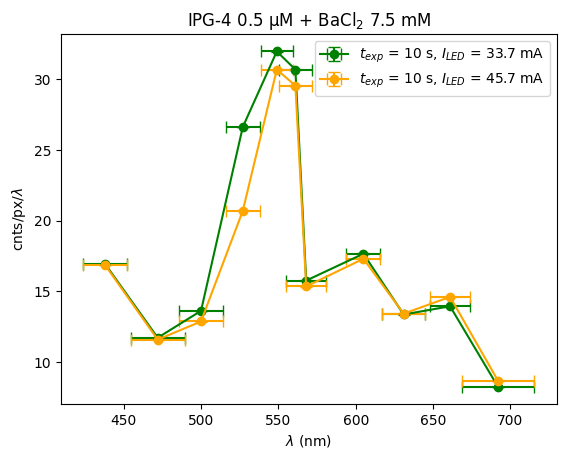

In [108]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM'
subdirs = [x[0] for x in os.walk(path)][1:]

names = ['$t_{exp}$ = 1 s, $I_{LED}$ = 33.7 mA', '$t_{exp}$ = 10 s, $I_{LED}$ = 33.7 mA', '$t_{exp}$ = 10 s, $I_{LED}$ = 45.7 mA']
col = ['b', 'g', 'orange']
for n,d in enumerate(subdirs[1:]):
    files = glob(d+'/*.tif')
    files.sort()
    print(files)

    c, un = prepare_spectrum(files, roi)

    plt.errorbar(x = filtAv, xerr=filtUn, y = c/(filtUn*2), yerr=un/(filtUn*2), fmt='o-', color=col[n+1], label=names[n+1])
plt.legend()
plt.gca().set(title='IPG-4 0.5 µM + BaCl$_2$ 7.5 mM')
plt.gca().set(xlabel='$\lambda$ (nm)', ylabel='cnts/px/$\lambda$')

In [110]:
files[5]

'/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 0.5 µM + BaCl2 7.5 mM/2/Center-561nm_Width-21nm_15-47-24.tif'

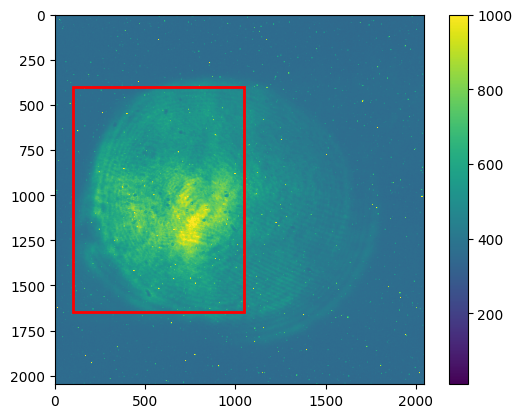

In [6]:
img = io.imread(files[5]).astype(np.int32)
plt.imshow(img, clim=(1e1,1e3) )
plt.colorbar()

roi = [400, 1648, 100, 1048]
imroi = img[roi[0]:roi[1], roi[2]:roi[3]]

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

## Sample C: IPG-4 120 µM free


['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2/Center-438nm_Width-28nm_16-59-29.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2/Center-472nm_Width-35nm_16-59-29.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2/Center-500nm_Width-29nm_16-59-29.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2/Center-527nm_Width-22nm_16-59-29.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2/Center-549nm_Width-21nm_16-59-29.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets

[Text(0.5, 0, '$\\lambda$ (nm)'), Text(0, 0.5, 'cnts/px/$\\lambda$')]

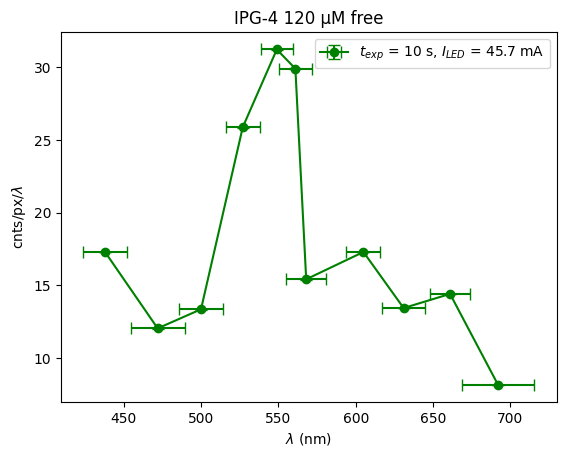

In [100]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM'
subdirs = [x[0] for x in os.walk(path)][1:]

names = ['$t_{exp}$ = 1 s, $I_{LED}$ = 45.7  mA', '$t_{exp}$ = 10 s, $I_{LED}$ = 45.7 mA']
col = ['b', 'g', 'orange']
for n,d in enumerate(subdirs[1:]):
    files = glob(d+'/*.tif')
    files.sort()
    print(files)

    c, un = prepare_spectrum(files, roi)

    plt.errorbar(x = filtAv, xerr=filtUn, y = c/(filtUn*2), yerr=un/(filtUn*2), fmt='o-', color=col[n+1], label=names[n+1])
plt.legend()
plt.gca().set(title='IPG-4 120 µM free')
plt.gca().set(xlabel='$\lambda$ (nm)', ylabel='cnts/px/$\lambda$')

In [7]:
files[5]

'/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2/Center-561nm_Width-21nm_16-59-29.tif'

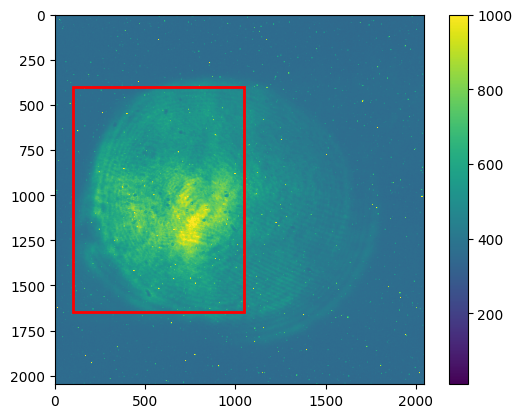

In [9]:
img = io.imread(files[5]).astype(np.int32)
plt.imshow(img, clim=(1e1,1e3) )
plt.colorbar()

roi = [400, 1648, 100, 1048]
imroi = img[roi[0]:roi[1], roi[2]:roi[3]]

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

## Compare to fluorimeter data

[Text(0.5, 0, '$\\lambda$ (nm)'), Text(0, 0.5, 'cnts/px/$\\lambda$')]

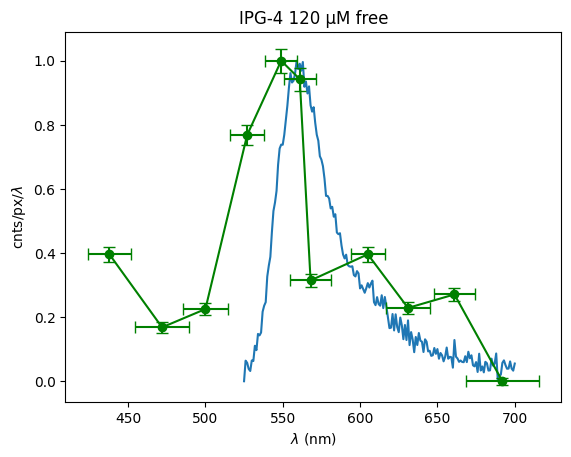

In [49]:
fluo_path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_free_0.5uM.csv'
fluo_data = pd.read_csv(fluo_path, skiprows=19, nrows=176, names=['λ (nm)', 'IPG4-Free'], index_col='λ (nm)')

yfl = fluo_data['IPG4-Free'].values
yfl -= yfl.min()
yfl /= yfl.max()

plt.plot(fluo_data.index.values, yfl)

ywd = c/(filtUn*2)
ywd -= ywd.min()
ywd /= ywd.max()

plt.errorbar(x = filtAv, xerr=filtUn, y = ywd, yerr=un/(filtUn*2), fmt='o-', color=col[n+1], label='Widefield, 10 s')
plt.gca().set(title='IPG-4 120 µM free')
plt.gca().set(xlabel='$\lambda$ (nm)', ylabel='cnts/px/$\lambda$')

## Tests reversing the filter order and blinding the objective:

['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM/1/Center-438nm_Width-28nm_12-14-26.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM/1/Center-472nm_Width-35nm_12-14-26.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM/1/Center-500nm_Width-29nm_12-14-26.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM/1/Center-527nm_Width-22nm_12-14-26.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM/1/Center-549nm_Width-21nm_12-14-26.tif', '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets

[Text(0.5, 0, '$\\lambda$ (nm)'), Text(0, 0.5, 'cnts/px/$\\lambda$')]

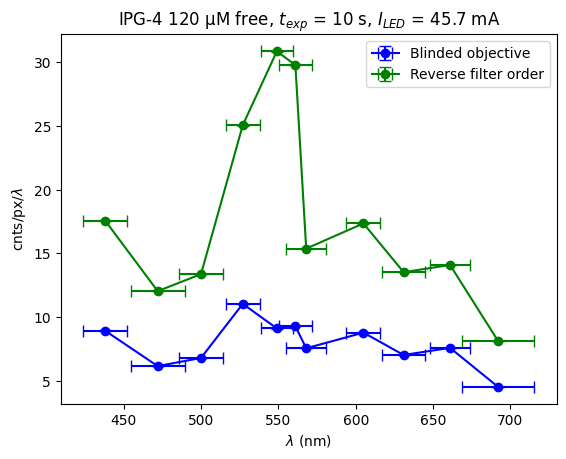

In [99]:
pathOct = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM'
subdirs = [x[0] for x in os.walk(pathOct)][1:]

names = ['Blinded objective', 'Reverse filter order']
col = ['b', 'g', 'orange']
for n,d in enumerate(subdirs):
    files = glob(d+'/*.tif')
    files.sort()
    print(files)

    c, un = prepare_spectrum(files, roi)

    plt.errorbar(x = filtAv, xerr=filtUn, y = c/(filtUn*2), yerr=un/(filtUn*2), fmt='o-', color=col[n], label=names[n])
plt.legend()
plt.gca().set(title='IPG-4 120 µM free, $t_{exp}$ = 10 s, $I_{LED}$ = 45.7 mA')
plt.gca().set(xlabel='$\lambda$ (nm)', ylabel='cnts/px/$\lambda$')

[Text(0.5, 0, '$\\lambda$ (nm)'), Text(0, 0.5, 'cnts/px/$\\lambda$')]

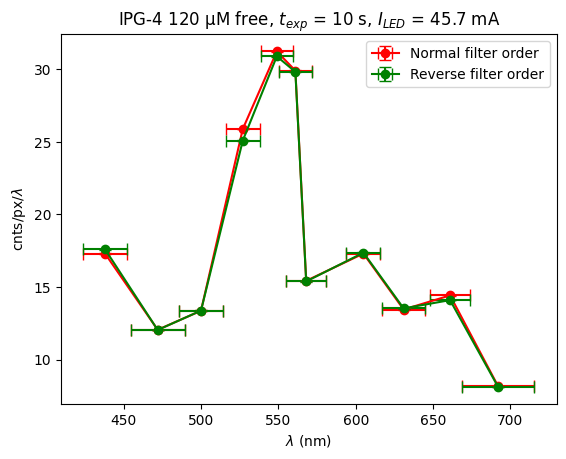

In [107]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/29-09-24/IPG-4 free 120 µM/2'
files = glob(path+'/*.tif')
files.sort()

c, un = prepare_spectrum(files, roi)
plt.errorbar(x = filtAv, xerr=filtUn, y = c/(filtUn*2), yerr=un/(filtUn*2), fmt='o-', color='r', label='Normal filter order')

pathOct = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/01-10-24/IPG-4 free 120 µM/2'

filesOc = glob(pathOct+'/*.tif')
filesOc.sort()

cOc, unOc = prepare_spectrum(filesOc, roi)
plt.errorbar(x = filtAv, xerr=filtUn, y = cOc/(filtUn*2), yerr=unOc/(filtUn*2), fmt='o-', color='g', label='Reverse filter order')

plt.legend()
plt.gca().set(title='IPG-4 120 µM free, $t_{exp}$ = 10 s, $I_{LED}$ = 45.7 mA')
plt.gca().set(xlabel='$\lambda$ (nm)', ylabel='cnts/px/$\lambda$')